In [52]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
galaxy_sample = '4'

if   galaxy_sample == '1':
    mag_lim = -17
elif galaxy_sample == '2':
    mag_lim = -18
elif galaxy_sample == '3':
    mag_lim = -19
elif galaxy_sample == '4':
    mag_lim = -20
elif galaxy_sample == '5':
    mag_lim = -21
elif galaxy_sample == '6':
    mag_lim = -22

from astropy.io import ascii
data = ascii.read("chains/sample_"+galaxy_sample+"_chain.dat")

In [54]:
nwalkers = 50
nsteps = len(data)//nwalkers
print(nsteps, nsteps*nwalkers)
data = data[:nsteps*nwalkers]

100 5000


In [55]:
p1 = np.array(data['col2'])
p1 = p1.reshape((nsteps,nwalkers)).T

p2 = np.array(data['col3'])
p2 = p2.reshape((nsteps,nwalkers)).T

p3 = np.array(data['col4'])
p3 = p3.reshape((nsteps,nwalkers)).T

p4 = np.array(data['col5'])
p4 = p4.reshape((nsteps,nwalkers)).T

p5 = np.array(data['col6'])
p5 = p5.reshape((nsteps,nwalkers)).T

p6 = np.array(data['col7'])
p6 = p6.reshape((nsteps,nwalkers)).T

p7 = np.array(data['col8'])
p7 = p7.reshape((nsteps,nwalkers)).T

p8 = np.array(data['col9'])
p8 = p8.reshape((nsteps,nwalkers)).T

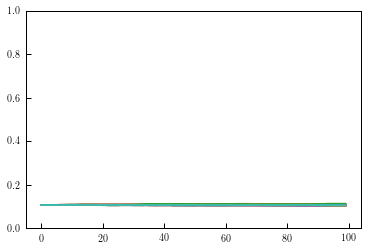

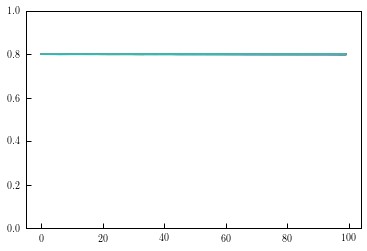

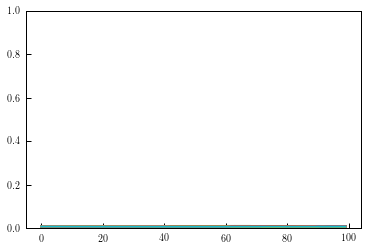

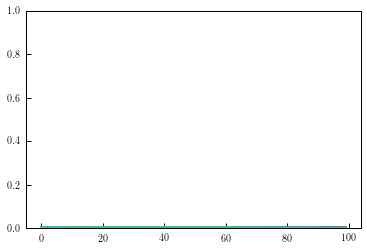

In [56]:
nwalkers = 50

for i in range(0,nwalkers):
    plt.plot(p1[i])
plt.ylim([0,1])
plt.show()

for i in range(0,nwalkers):
    plt.plot(p2[i])
plt.ylim([0,1])
plt.show()

for i in range(0,nwalkers):
    plt.plot(p3[i])
plt.ylim([0,1])
plt.show()

for i in range(0,nwalkers):
    plt.plot(p4[i])
plt.ylim([0,1])
plt.show()

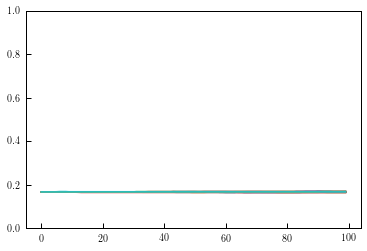

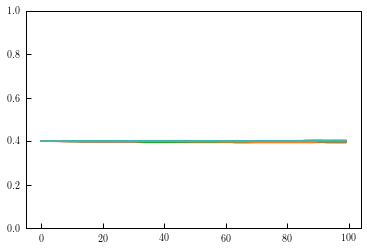

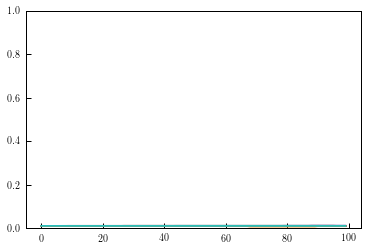

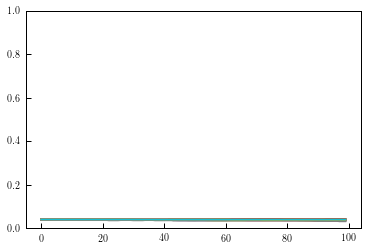

In [57]:
for i in range(0,nwalkers):
    plt.plot(p5[i])
plt.ylim([0,1])
plt.show()

for i in range(0,nwalkers):
    plt.plot(p6[i])
plt.ylim([0,1])
plt.show()

for i in range(0,nwalkers):
    plt.plot(p7[i])
plt.ylim([0,1])
plt.show()

for i in range(0,nwalkers):
    plt.plot(p8[i])
plt.ylim([0,1])
plt.show()

In [58]:
from make_mock import make_galaxy_sample

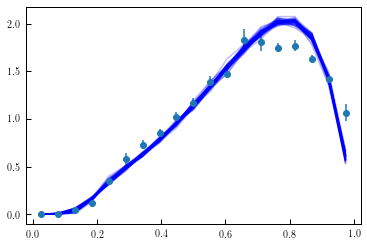

In [59]:
from astropy.table import Table
t_1 = Table.read('../data/sample_'+galaxy_sample+'_shapes.dat', format='ascii')

for i in range(nwalkers):
    j = -1 
    d = {'disk_shape_mu_1_centrals': p1[i,j],
         'disk_shape_mu_2_centrals': p2[i,j],
         'disk_shape_var_1_centrals': p3[i,j],
         'disk_shape_var_2_centrals': p4[i,j],
         'elliptical_shape_mu_1_centrals': p5[i,j],
         'elliptical_shape_mu_2_centrals': p6[i,j],
         'elliptical_shape_var_1_centrals': p7[i,j],
         'elliptical_shape_var_2_centrals': p8[i,j]}
    
    mock = make_galaxy_sample(mag_lim=mag_lim,**d)
    
    # measure shape distribution
    bins = np.linspace(0,1,20)
    bin_centers = (bins[:-1]+bins[1:])/2.0
    
    mag_key = 'obs_Mag_r'
    mask = (mock[mag_key]<mag_lim) & (mock[mag_key]>(mag_lim-1.0))
    
    x = mock['galaxy_projected_b_to_a']
    counts = np.histogram(x[mask], bins=bins)[0]
    counts = 1.0*counts/np.sum(mask)/np.diff(bins)
    
    plt.plot(bin_centers, counts, alpha=0.25, color='blue')
plt.errorbar(t_1['q'],t_1['frequency'],t_1['err'], fmt='o')
plt.show()